In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
from scipy.optimize import minimize
from scipy import signal, optimize

import statsmodels.api as sm
import itertools

from numpy import dot
import warnings
warnings.filterwarnings('ignore')
import numdifftools as ndt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# .Py file with all new functions
import ARMA_Functions as armf

## start 

In [11]:
armf = reload(armf)
pars  = [.3, .5]
sz    = 800

sdata, _ = armf.generateArma(pars, sz)

#### calculating the Hessian and the Scores

In [19]:
armf = reload(armf)
armf.getHandScores(pars, sdata, .1, beta=True)

(array([[-0.00194262]]), 0.0012930665880858411)

# Re-understanding Vladimir's code
$X_ij = dLPPLS(t_i; tc, psi) / dpsi_j$

$H_ij = \sum_k err_k * d^2LPPLS(t_k, tc, psi) / dpsi_i dpsi_j$ 

X, H = calc_lppl_X_H(t, logP, pars[ind, :], no_w=no_w, no_m=no_m)

I_psi = np.dot(X.T, X) - H

detI = np.abs(np.linalg.det(I_psi))  # To avoid duplicated calculations: I_psi

detS = np.abs(np.linalg.det(np.dot(X_hat.T, X)))

-(len(t)-p-2.)/2. * np.log(s_tc[ind]) + np.log(detI)/2.- np.log(detS)

## Now testing

In [69]:
# Compute the FIM at the optimal theta* and variying beta (or vice-versa)
armf = reload(armf)

variyngBeta_fix = .5
armf.calculate_hessianMatrix(pars, sdata, variyngBeta_fix, beta=True)

-0.0017132988979496945

In [70]:
armf = reload(armf)

T = armf.getFisherInfoMatrixFullARMAModel(sdata, pars)
print(T)
print('The determinant of the FIM is %s'%np.abs(np.linalg.det(T)))

[[-0.00197074 -0.00264154]
 [-0.00264154 -0.0018929 ]]
The determinant of the FIM is 3.24730043505e-06


In [71]:
armf = reload(armf)

armf.calc_scoresLprofile(pars, sdata, variyngBeta_fix, beta=True)

-0.00086855356942892924

In [74]:
armf = reload(armf)

a,b = armf.getHandScores(pars, sdata, variyngBeta_fix, beta=True)
a

-0.0017132988979496945

### now the main func

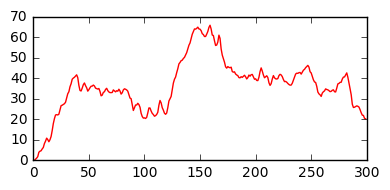

In [246]:
pars = [0.3, 0.55]
sz   = 300
sdata, _ = armf.generateArma(pars, sz)

f,ax = plt.subplots(1,1,figsize=(4,2))
plt.plot(np.cumsum(sdata), color='r')
plt.tight_layout()

In [253]:
armf = reload(armf)

a, b, c, d = armf.estimate_mpl_beta(sdata)
d

In [256]:
armf.estimatorARMA(sdata)

array([ 0.33223537,  0.48313279])

In [257]:
aa,_,_,t = armf.profileARMA_estimator(sdata, beta=True)
t

array([ 0.32564103,  0.48781524])

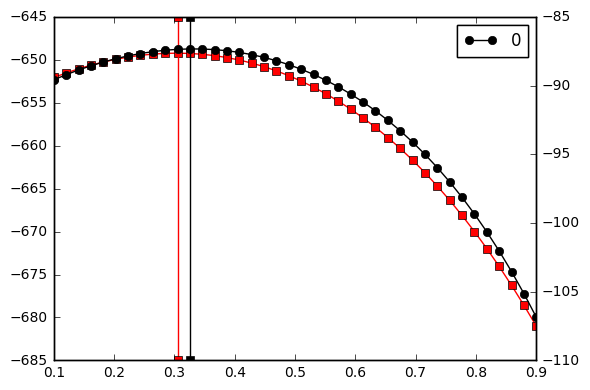

In [271]:
minLMP  = a[a==a.min()].dropna().index[0]
minLP = aa[aa==aa.min()].dropna().index[0]

(-a).plot(color='r', marker='s')
plt.axvline(minLMP, color='r', marker='s')
ab = plt.twinx()
(-aa).plot(ax=ab, color='k', marker='o')
ab.axvline(minLP, color='k', marker='s')
plt.tight_layout()

#### theta

In [276]:
e, f, g, h = armf.estimate_mpl_theta(sdata)
h

array([ 0.46923077,  0.34274996])

# All together

In [284]:
armf = reload(armf)
res = armf.estimator_estimateBias(sdata, pars, allPars=True)

In [285]:
res

,qmlBias,LpBetaBias,LpThetaBias,LmBetaBias,LmThetaBias
0,0.099103,0.087826,0.087408,0.034293,0.123519


# Simulate 

In [4]:
armf = reload(armf)
truePars = [0.3, 0.6]
sz = 300

RES = armf.MonteCarloBias(truePars, sz, MC=30)

In [ ]:
RES

In [6]:
#several times 
%time meanResFull, stdResFull = armf.MonteCarloBias_fullIteration(truePars, MC=5)

100
147
194
242
289
336
384
431
478
526
573
621
668
715
763
810
857
905
952
1000
CPU times: user 7h 29min 53s, sys: 51.5 s, total: 7h 30min 45s
Wall time: 7h 30min 44s


# different Pars

In [ ]:
armf = reload(armf)
truePars = [0.2, 0.5]

%time meanResFull2, stdResFull2 = armf.MonteCarloBias_fullIteration(truePars, MC=10)

100
200


In [23]:
armf = reload(armf)
truePars = [0.15, 0.35]

%time meanResFull3, stdResFull3 = armf.MonteCarloBias_fullIteration(truePars, MC=5)

100
200
300
400
500
600
700
800
900
1000
CPU times: user 4h 11min 29s, sys: 50.6 s, total: 4h 12min 19s
Wall time: 4h 12min 56s


# Analyse results

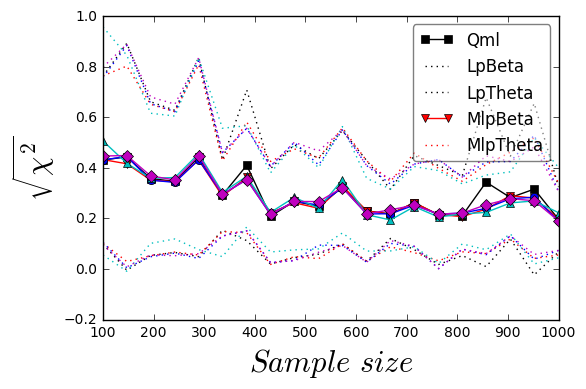

In [22]:
armf.plot_McResults(np.sqrt(meanResFull), np.sqrt(stdResFull))

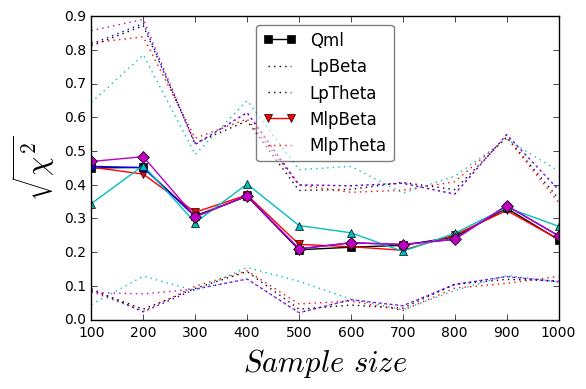

In [21]:
armf.plot_McResults(np.sqrt(meanResFull2), np.sqrt(stdResFull2))

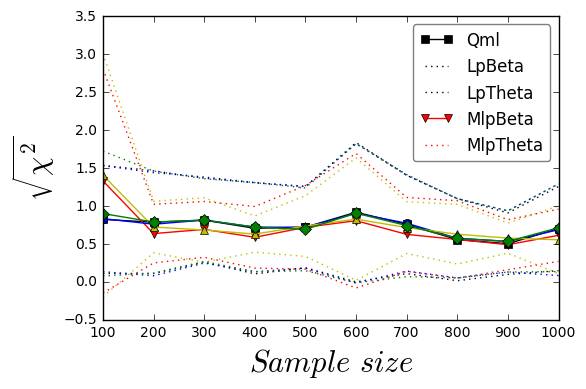

In [27]:
armf = reload(armf)
armf.plot_McResults(np.sqrt(meanResFull3), np.sqrt(stdResFull3))